In [1]:
import math
import os.path
import pandas as pd
import json
from random import shuffle
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
print (os.getcwd())

/Users/Kabbani/Desktop/Insper/Ciência dos Dados/P3-CD-AA-BK-GB-GK


In [2]:
dados=pd.read_csv('AB_NYC_2019.csv')
dados=dados[dados.room_type=='Entire home/apt']
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

## Análise Exploratória

### Latitude e longitude:

In [12]:
y=dados['price']
x=dados[['latitude','longitude']]

regressao=regress(x,y)
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           4.82e-96
Time:                        16:15:43   Log-Likelihood:            -1.7937e+05
No. Observations:               25409   AIC:                         3.588e+05
Df Residuals:                   25406   BIC:                         3.588e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.269e+04   3483.897    -20.866      0.000   -7.95e+04   -6.59e+04
latitude     277.9335     34.992      7.943      0.000     209.348     346.519
longitude   -832.6832     41.627    -20.004      0.000    -914.274    -751.093
==============================================================================
Omnibus:                    51292.664   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        190325287.639
Skew:                          16.675   Prob(JB):                         0.00
Kurtosis:                     425.681   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
c=regressao.params['const']
lat=regressao.params['latitude']
long=regressao.params['longitude']

In [6]:
def f(latitude,longitude):
    return c + lat*latitude + long*longitude

In [7]:
npoints=100
latitude= np.linspace(x['latitude'].min(), x['latitude'].max(), npoints)
longitude= np.linspace(x['longitude'].min(), x['longitude'].max(), npoints)

In [8]:
latitude_x , longitude_y = np.meshgrid(latitude,longitude)

In [9]:
s = f(latitude_x,longitude_y)

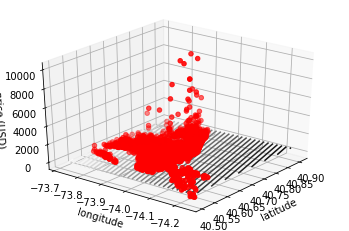

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['latitude'],x['longitude'],y,c='r',marker='o')
ax.contour3D(latitude_x,longitude_y,s,50,cmap='binary')
ax.view_init(30,-142)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('price (USD)')
plt.show()

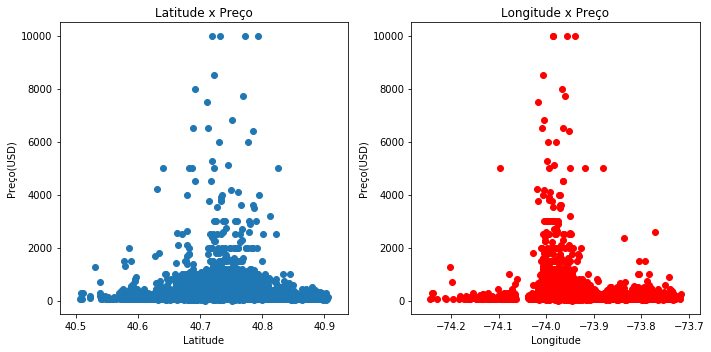

In [46]:
#fazer parabolas

fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x['latitude'],y)
plt.title('Latitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Latitude')

plt.subplot(122)
plt.scatter(x['longitude'],y,color='r')
plt.title('Longitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

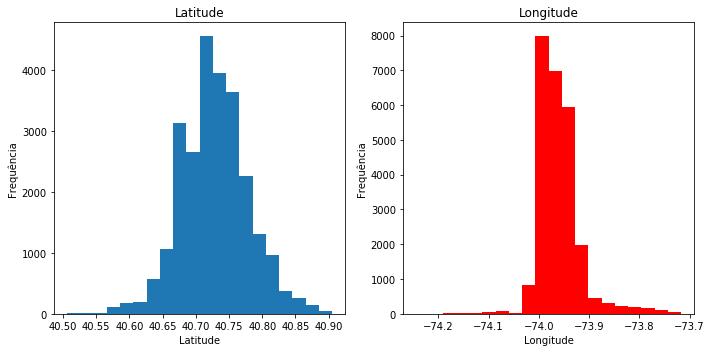

In [47]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot=x['latitude'].plot.hist(bins=20)
plt.title('Latitude')
plt.ylabel('Frequência')
plt.xlabel('Latitude')

plt.subplot(122)
plot=x['longitude'].plot.hist(bins=20,color='r')
plt.title('Longitude')
plt.ylabel('Frequência')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

### Quantidade de reviews por mês:

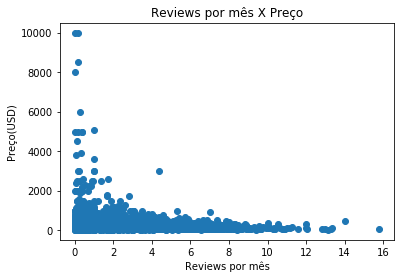

In [50]:
#log

plt.scatter(dados['reviews_per_month'],dados['price'])
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

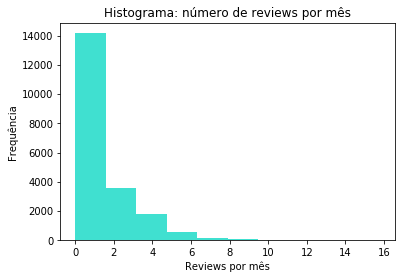

In [53]:
dados.reviews_per_month.plot.hist(bins=10,color='turquoise')
plt.ylabel('Frequência')
plt.xlabel('Reviews por mês')
plt.title('Histograma: número de reviews por mês')
plt.show()

### Burgos de Nova Iorque:

In [66]:
manhattan = dados.loc[(dados.neighbourhood_group == 'Manhattan')]
brooklyn = dados.loc[(dados.neighbourhood_group == 'Brooklyn')]
queens = dados.loc[(dados.neighbourhood_group == 'Queens')]
bronx = dados.loc[(dados.neighbourhood_group == 'Bronx')]
statenisland = dados.loc[(dados.neighbourhood_group == 'Staten Island')]

In [74]:
man = manhattan['price'].mean()
brook =  brooklyn['price'].mean()
queenao =  queens['price'].mean()
bronxobas =  bronx['price'].mean()
staten = statenisland['price'].mean()
print('O preço médio de um Airbnb em Staten Island é: ', statenisland['price'].mean())
print('O preço médio de um Airbnb em Manhattan é: U$D', manhattan['price'].mean())
print('O preço médio de um Airbnb em Brooklyn é: U$D', brooklyn['price'].mean())
print('O preço médio de um Airbnb no Queens é: U$D', queens['price'].mean())
print('O preço médio de um Airbnb no Bronx é: U$D', bronx['price'].mean())

man_std = manhattan['price'].std()
brook_std =  brooklyn['price'].std()
queenao_std =  queens['price'].std()
bronxobas_std =  bronx['price'].std()
staten_std = statenisland['price'].std()

O preço médio de um Airbnb em Staten Island é:  173.8465909090909
O preço médio de um Airbnb em Manhattan é: U$D 249.23910902341086
O preço médio de um Airbnb em Brooklyn é: U$D 178.32754472225128
O preço médio de um Airbnb no Queens é: U$D 147.05057251908397
O preço médio de um Airbnb no Bronx é: U$D 127.5065963060686


Text(0, 0.5, 'Valor em U$D')

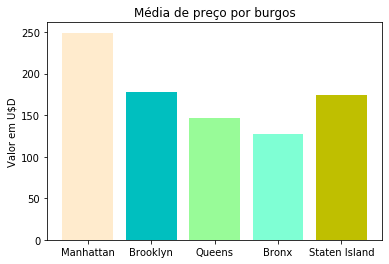

In [75]:
mean_burgos = {'Manhattan': man , 'Brooklyn': brook , 'Queens': queenao, 'Bronx': bronxobas, 'Staten Island': staten}
names=list(mean_burgos.keys())
values=list(mean_burgos.values())
plt.bar(names,values, color = ('blanchedalmond','c','palegreen','aquamarine','y'))
plt.title("Média de preço por burgos")
plt.ylabel('Valor em U$D')

In [78]:
#Inserir gráfico com margem de erro, colocar min e max de cada e escrever um textinho peq explicando.
burgos = ['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
x_pos = np.arange(len(burgos))
medias_burgos = [man,brook,queenao,bronxobas,staten]
variacao = [man_std,brook_std,queenao_std,bronxobas_std,staten_std]

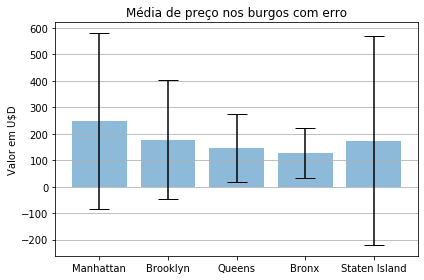

In [79]:
#Gráfico mostra a variação dos preços (quando formos fazer o proj final seria interessante comecar cm esses graficos e 
#depois ir mostrando como agnt 'ajusta' essa variacao)
fig, ax = plt.subplots()
ax.bar(x_pos, medias_burgos, yerr=variacao, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Valor em U$D')
ax.set_xticks(x_pos)
ax.set_xticklabels(burgos)
ax.set_title('Média de preço nos burgos com erro')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()